In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

In [0]:
data=pd.read_csv("/content/drive/My Drive/classification/Faculty_Notebook Day 2/Faculty_Notebook/data.csv")

In [72]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
data.drop("Unnamed: 32",axis=1,inplace=True)

In [74]:
data.shape

(569, 32)

In [0]:
data.drop("id",axis=1,inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [77]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
data['diagnosis'].replace({'M':1,'B':0},inplace=True)

In [79]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


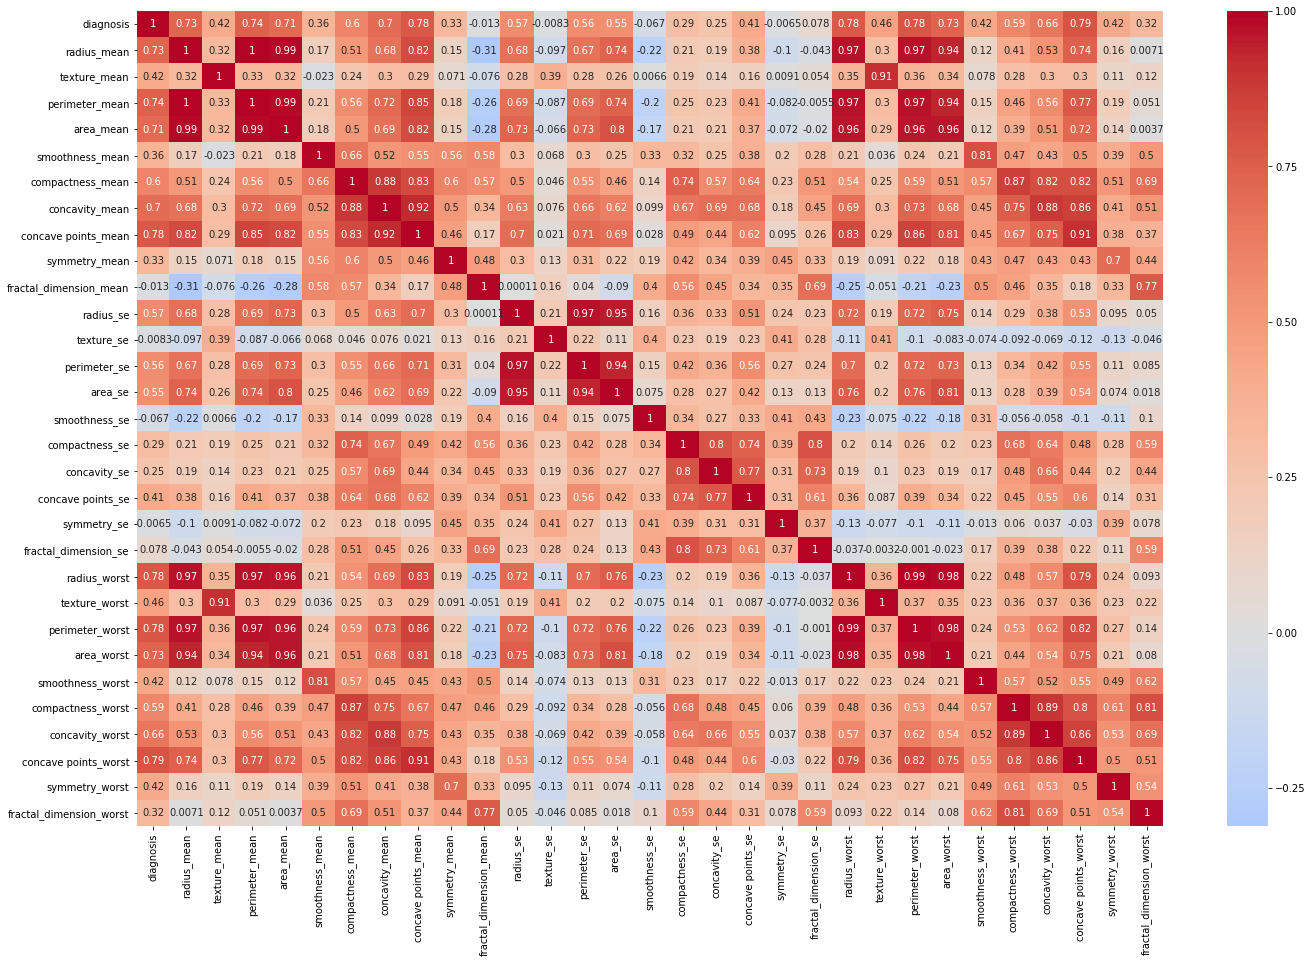

In [80]:
plt.figure(figsize=(23,15))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm',center=0)
plt.show()

In [0]:
x=data.drop("diagnosis",axis=1)
y=data['diagnosis']


In [82]:
x.shape

(569, 30)

In [83]:
y.shape

(569,)

In [0]:
from sklearn import model_selection 
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier(criterion="entropy",random_state=0)
dt_reg=DecisionTreeClassifier(max_depth=5,criterion="entropy",random_state=0)
rf=RandomForestClassifier(n_estimators=10,random_state=0)

In [0]:
models=[]
models.append(("Logistic",lr))
models.append(("fgdt",dt))
models.append(("Regularized_dt",dt_reg))
models.append(("random_frst",rf))

### **KFOLD**

Logistic 0.991449 (0.000043)
fgdt 0.925109 (0.000594)
Regularized_dt 0.929676 (0.001093)
random_frst 0.988738 (0.000126)


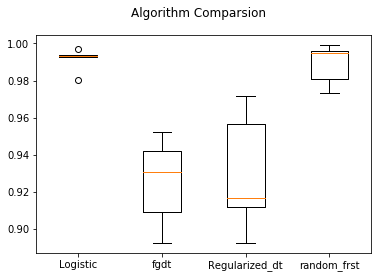

In [149]:
#evaluate each model in turn
from sklearn.model_selection import KFold, cross_val_score
results=[]
names=[]
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s %f (%f)"% (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
#boxplot algorithm
fig=plt.figure()
fig.suptitle("Algorithm Comparsion")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [150]:
results

[array([0.99396634, 0.99323362, 0.98006757, 0.99296675, 0.99700997]),
 array([0.93077167, 0.95192308, 0.89222973, 0.94181586, 0.90880399]),
 array([0.91632264, 0.97150997, 0.89222973, 0.95652174, 0.91179402]),
 array([0.99587171, 0.99501425, 0.97314189, 0.98065857, 0.99900332])]

In [145]:
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from IPython.display import Image
from sklearn import tree
from os import system

BC_Tree_File=open("bc_data.dot","w")
dot_data=tree.export_graphviz(dt,out_file=BC_Tree_File,feature_names=list(x),class_names=["Benign","Malignent"])

BC_Tree_File.close()

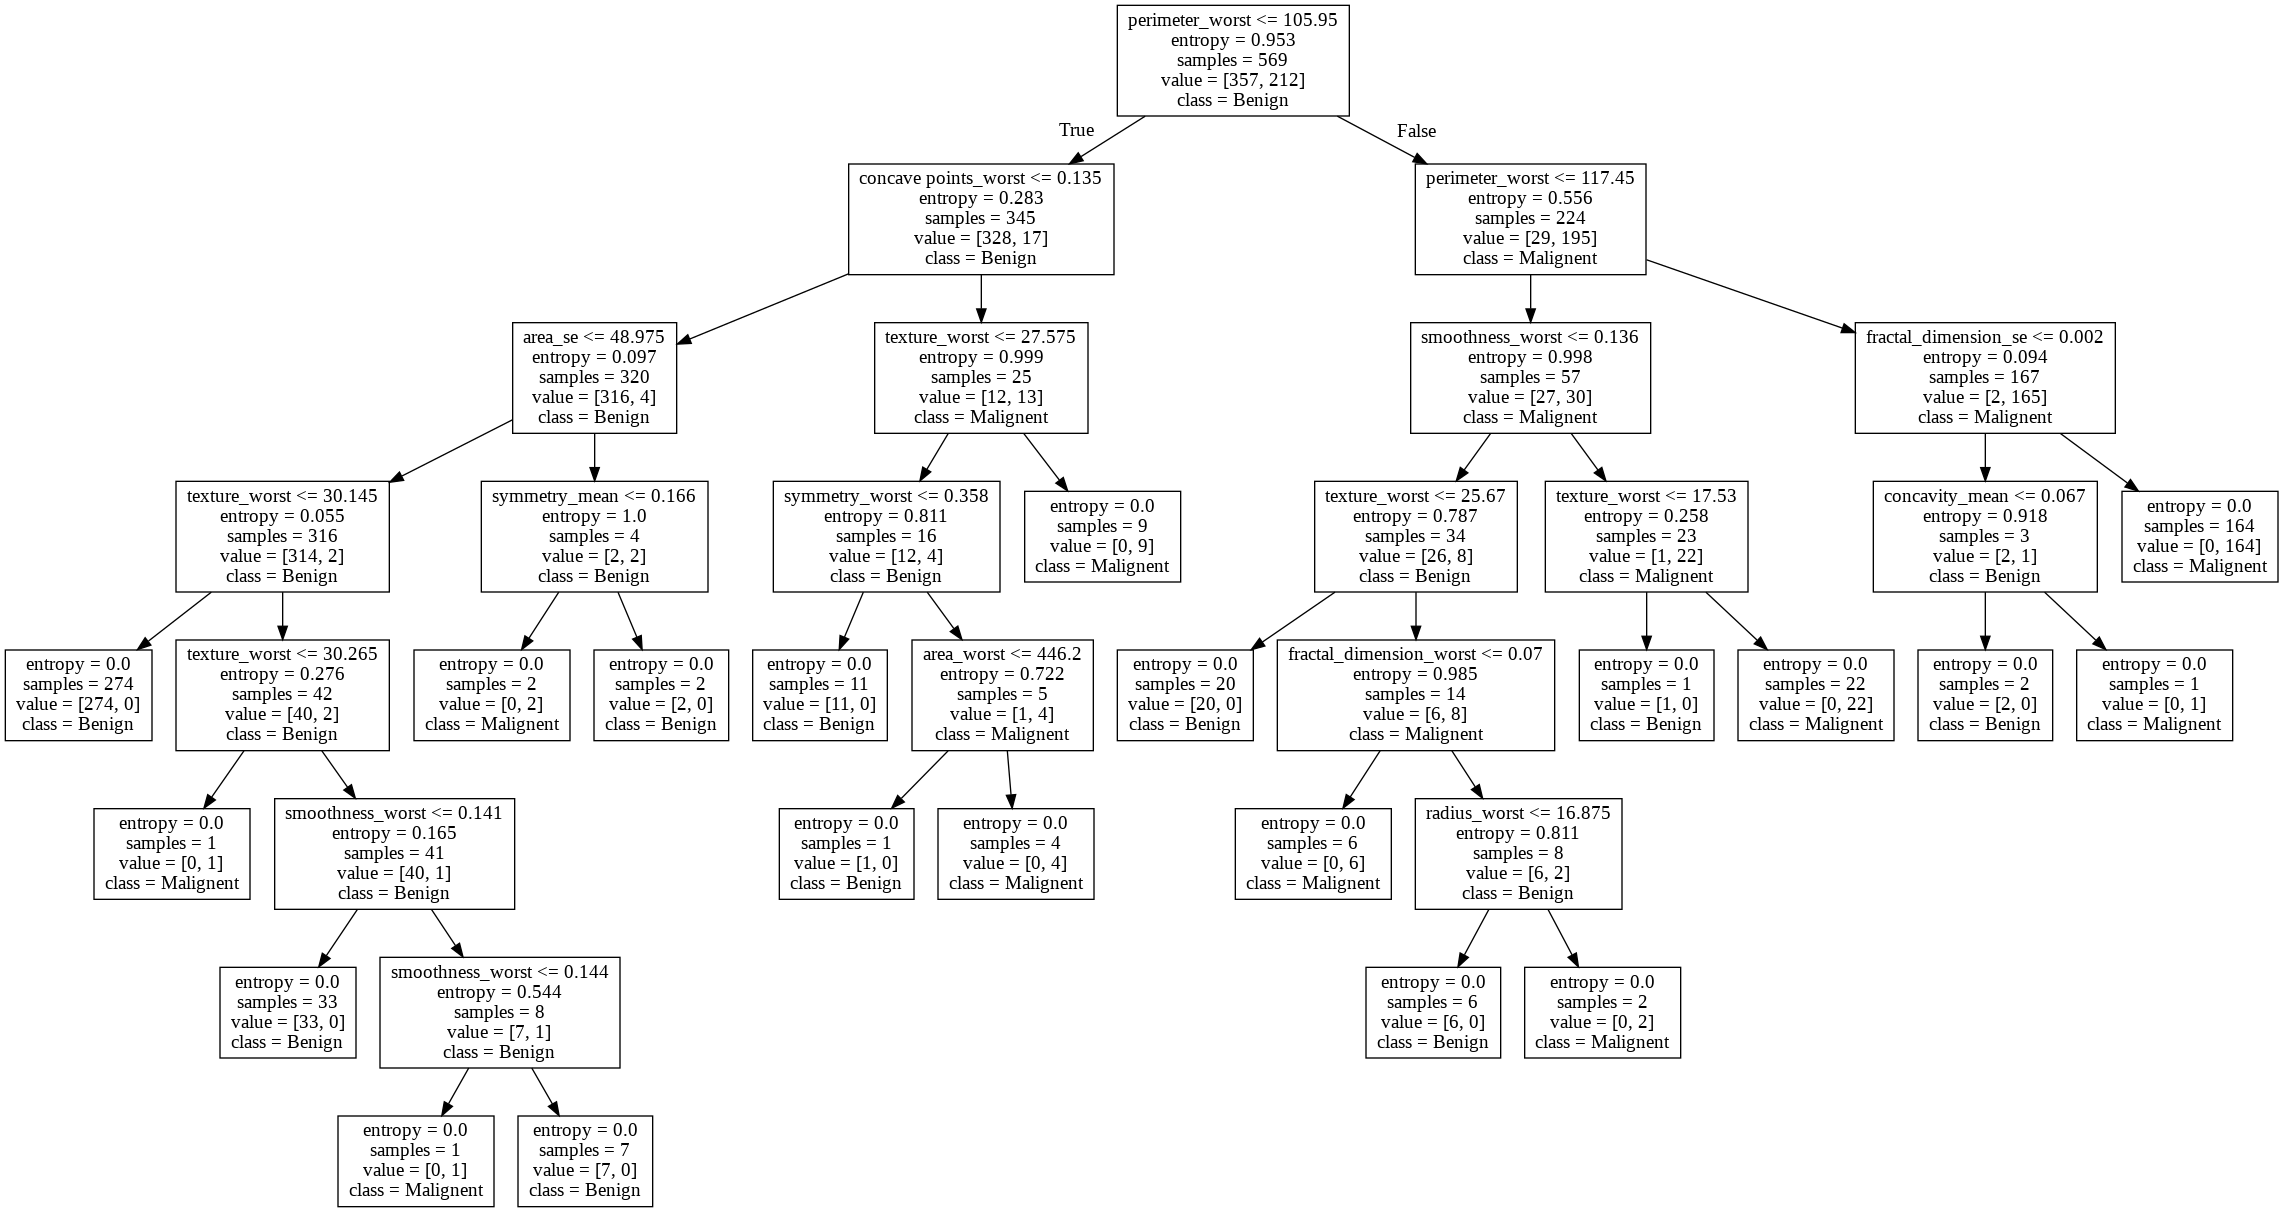

In [147]:
system("dot -Tpng bc_data.dot -o BC_tree.png") #this command is to the cs
Image("BC_tree.png")

In [138]:
print(pd.DataFrame(dt.feature_importances_,columns=["Imp"],index=x.columns)) #it is calculated as how many times feature used in total splitpoints (prob) ,perimeter_worst used more 70% of times 

                              Imp
radius_mean              0.000000
texture_mean             0.000000
perimeter_mean           0.000000
area_mean                0.000000
smoothness_mean          0.000000
compactness_mean         0.000000
concavity_mean           0.005082
concave points_mean      0.000000
symmetry_mean            0.007379
fractal_dimension_mean   0.000000
radius_se                0.000000
texture_se               0.000000
perimeter_se             0.000000
area_se                  0.017597
smoothness_se            0.000000
compactness_se           0.000000
concavity_se             0.000000
concave points_se        0.000000
symmetry_se              0.000000
fractal_dimension_se     0.023763
radius_worst             0.011973
texture_worst            0.076738
perimeter_worst          0.685889
area_worst               0.006659
smoothness_worst         0.057138
compactness_worst        0.000000
concavity_worst          0.000000
concave points_worst     0.077020
symmetry_worst